In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

c:\Users\Stark\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df_spam = pd.read_csv("spam.csv") 
telco_df = pd.read_csv("Telco-Customer-Churn.csv")   

In [5]:
df_spam.head() 

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
telco_df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telco_df.drop('customerID', inplace = True, axis = 1)  

In [12]:
telco_df.isna().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].apply(lambda x: x if x else np.nan).astype(np.float16)  

In [13]:
telco_df.shape 

(7043, 20)

In [15]:
telco_df.isna().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco_df['Churn'] = telco_df['Churn'].map({'Yes':1, 'No':0})   

In [18]:
telco_df['Churn'] 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
telco_df.dropna(axis = 0, how = 'any', inplace = True)   

In [42]:
telco_encoded = pd.get_dummies(telco_df, drop_first=True)  

In [20]:
telco_encoded.head() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.84375,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1890.00000,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.12500,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1841.00000,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.62500,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [43]:
telco_encoded.isna().sum() 

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [23]:
telco_df.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
telco_df.shape 

(7032, 20)

In [44]:
X = telco_encoded.drop('Churn', axis = 1) 
Y = telco_encoded['Churn']  

In [45]:
X.shape, Y.shape 

((7032, 30), (7032,))

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, shuffle=True, random_state=69)  

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((4922, 30), (2110, 30), (4922,), (2110,))

In [48]:
rfc = RandomForestClassifier(n_estimators= 100, random_state = 69) 
 

In [49]:
rfc 

RandomForestClassifier(random_state=69)

In [50]:
rfc.fit(x_train, y_train)  

RandomForestClassifier(random_state=69)

In [52]:
import pickle

In [53]:
res = rfc.predict(x_test)  

In [54]:
mat = confusion_matrix(y_test, res) 

<Axes: >

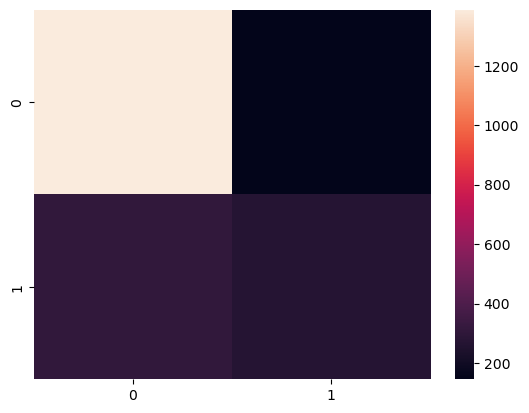

In [55]:
sns.heatmap(mat) 

In [56]:
mat 

array([[1389,  145],
       [ 309,  267]], dtype=int64)

In [59]:
f = open("telco_rfc.pkl", 'wb') 

In [60]:
pickle.dump(rfc,f) 

In [61]:
f.close() 

In [65]:
f=open("telco_rfc.pkl", 'rb')
model = pickle.load(f)    

In [67]:
model 

RandomForestClassifier(random_state=69)